## Diffusion Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### DLA algorithm
- Initialize with a solid at the centre
- Keep on doing this:
    - Generate random walkers at random positions in the liquid
    - Walk randomly until the neighbourhood of a random walker is a solid. Then make the random walker also a solid.

In [2]:
def initialize_particle(r_start):
    # initialize a random walker at a random position at radius r_start from the centre
    theta = 2*np.pi*np.random.random()
    x = mesh_x//2 + r_start*np.cos(theta)
    y = mesh_y//2 + r_start*np.sin(theta)
    return int(x), int(y) # these are indices of array, so they should always be integers

def check_neighbour(x, y):
    if phase[x+1,y] == 0 and phase[x-1,y] == 0 and phase[x,y-1] == 0 and phase[x,y+1] == 0:
        return "liquid"
    else:
        return "solid"
    
def check_boundary(x, y):
    if 1 < x < mesh_x-1 and 1 < y < mesh_y-1:
        return "inside"
    else:
        return "outside"

def random_walk(x, y):
    """
    copied from the last tutorial code
    """
    random_number = np.random.random()
    if random_number < 0.25:
        x, y = x-1, y # turn left
    elif random_number < 0.5:
        x, y = x+1, y # turn right
    elif random_number < 0.75:
        x, y = x, y+1 # turn up
    else:
        x, y = x, y-1 # turn down
    return x, y

def update_r(x, y, r_max_solid, r_start_rw):
    if (x - mesh_x//2)**2 + (y-mesh_y//2)**2 > r_max_solid**2:
        r_max_solid = np.sqrt( (x - mesh_x//2)**2 + (y-mesh_y//2)**2 )
        r_start_rw = r_max_solid + 5
    return r_max_solid, r_start_rw

In [3]:
mesh_x = 200
mesh_y = mesh_x
phase = np.zeros( (mesh_x, mesh_y) ) # all is liquid
# 0 = liquid, > 0 = solid
phase[mesh_x//2, mesh_y//2] = 1 # initialize solid nucleus at the centre
r_max_solid = 1
r_start_rw = r_max_solid + 5 # vary this number 5
count_solid_particles = 1
while r_start_rw < mesh_x//2 - 1:
    x, y = initialize_particle(r_start_rw)
    while check_neighbour(x, y) == "liquid":
        x, y = random_walk(x, y)
        if check_boundary(x, y) == "outside":
            break
        if check_neighbour(x, y) == "solid":
            count_solid_particles += 1
            phase[x, y] = count_solid_particles
            r_max_solid, r_start_rw = update_r(x, y, r_max_solid, r_start_rw)
            break

### Plot

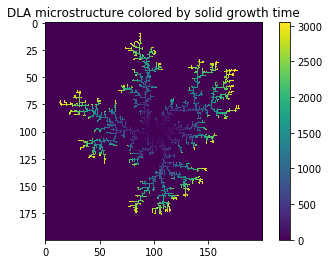

In [5]:
plt.imshow(phase)
plt.title('DLA microstructure colored by solid growth time')
plt.colorbar()
plt.show()